In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import extract_dataframe as exdf
import clean_tweets_dataframe as cldf

In [6]:
"""
_, global_tweets_data = exdf.read_json('data/global_twitter_data.json')

global_tweets = exdf.TweetDfExtractor(global_tweets_data)

df_global = global_tweets.get_tweet_df(save = True, file_name = 'data/global_processed_tweets.csv')

"""

File Successfully Saved.!!!


In [10]:
"""
_, africa_tweets_data = exdf.read_json('data/africa_twitter_data.json')

africa_tweets = exdf.TweetDfExtractor(africa_tweets_data)

df_africa = africa_tweets.get_tweet_df(save = True, file_name = 'data/africa_processed_tweets.csv')

"""

File Successfully Saved.!!!


# Global Tweets

lets first take a look at the global tweets.

In [3]:
df_global = pd.read_csv('data/global_processed_tweets.csv')

In [4]:
df_global.shape

(22000, 16)

In [5]:
df_global.head(4)

,statuses_coun,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,8097,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-0.125,0.190625,en,15760,2,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,5831,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-0.100,0.100000,en,6967,201,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,1627,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000,0.000000,en,2166,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,1627,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",0.100,0.350000,en,2166,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands


In [6]:
def sentiment_text(x: float)-> str:
    x = round(x, 2)
    if x <0:
        return "negative"
    elif x > 0:
        return "positive"
    else:
        return "neutral"

In [7]:
df_global["sentiment"] = df_global["polarity"].apply(sentiment_text)

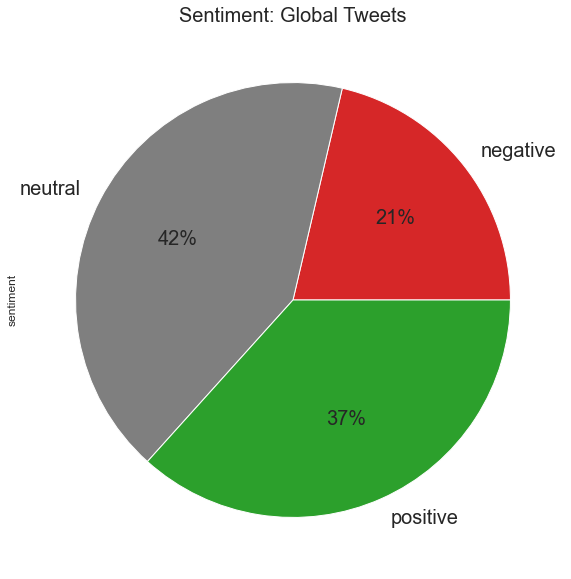

In [17]:
# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
df_global['sentiment'].value_counts().sort_index().plot(kind='pie', 
                                                     autopct='%1.0f%%', 
                                                     colors=["tab:red", "tab:gray", "tab:green"], 
                                                     textprops={'fontsize': 20})
plt.title("Sentiment: Global Tweets", fontsize = 20)
plt.savefig("global_sentiment.jpg")

# African Tweets

Now we consider tweets from Africa.

In [9]:
df_africa = pd.read_csv('data/africa_processed_tweets.csv')

In [10]:
df_africa.shape

(28608, 16)

In [11]:
df_africa.head(4)

,statuses_coun,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,888,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,697,0,DzCritical,318,373,NaN,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie
1,1597,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,2160,0,toopsat,764,144,False,"[{'text': 'Pelosi', 'indices': [149, 156]}, {'...",[],NaN
2,2293,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,10841,0,NassimaLilEmy,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie
3,44,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,280,0,d_dhayae,60,463,False,"[{'text': 'HOBIPALOOZA', 'indices': [0, 12]}, ...",[],Chlef


In [12]:
df_africa["sentiment"] = df_africa["polarity"].apply(sentiment_text)

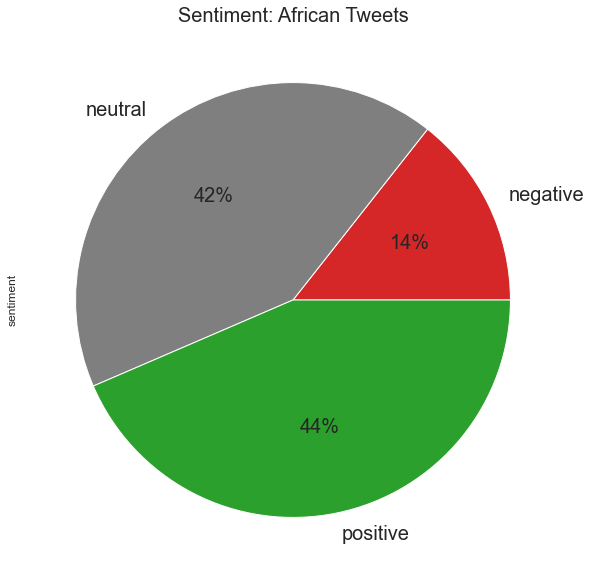

In [18]:
# Distribution of sentiments across all the tweets.
sns.set(rc={'figure.figsize':(14,10)})
df_africa.sentiment.value_counts().sort_index().plot(kind='pie', 
                                                     autopct='%1.0f%%', 
                                                     colors=["tab:red", "tab:gray", "tab:green"], 
                                                     textprops={'fontsize': 20})
plt.title("Sentiment: African Tweets", fontsize= 20)
plt.savefig("africa_sentiment.jpg")